## Create CNN Model and Optimize it using Keras Tuner

In [38]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt

In [39]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

170500096/170498071 [==============================] - 11s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [40]:
## Each image is a 32 x 32 x 3 numpy array
x_train[444].shape

(32, 32, 3)

[9]


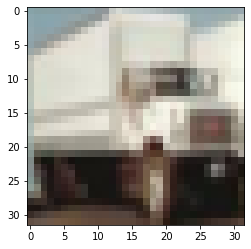

In [41]:
print(y_train[444])
plt.imshow(x_train[444]);

In [42]:
num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [43]:
# now instead of classes described by an integer between 0-9 we have a vector with a 1 in the (Pythonic) 9th position
y_train[444]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [44]:
# As before, let's make everything float and scale
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [45]:
# Let's build a CNN using Keras' Sequential capabilities

model_1 = Sequential()


## 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2), padding='same',
                 input_shape=x_train.shape[1:]))
model_1.add(Activation('relu'))

## Another 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2)))
model_1.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

## Flatten turns 3x3x32 into 288x1
model_1.add(Flatten())
model_1.add(Dense(512))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))

model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 16, 16, 32)        2432      
_________________________________________________________________
activation (Activation)      (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 6, 32)          25632     
_________________________________________________________________
activation_1 (Activation)    (None, 6, 6, 32)          0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 3, 3, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 3, 3, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 288)              

In [46]:
batch_size = 32

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0005, decay=1e-6)

# Let's train the model using RMSprop
model_1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model_1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=15,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/15
1563/1563 [==============================] - 11s 6ms/step - loss: 1.9325 - accuracy: 0.2893 - val_loss: 1.4995 - val_accuracy: 0.4559
Epoch 2/15
1563/1563 [==============================] - 10s 6ms/step - loss: 1.4888 - accuracy: 0.4619 - val_loss: 1.3428 - val_accuracy: 0.5209
Epoch 3/15
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3702 - accuracy: 0.5081 - val_loss: 1.2732 - val_accuracy: 0.5365
Epoch 4/15
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3056 - accuracy: 0.5348 - val_loss: 1.2803 - val_accuracy: 0.5516
Epoch 5/15
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2455 - accuracy: 0.5593 - val_loss: 1.1799 - val_accuracy: 0.5821
Epoch 6/15
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2232 - accuracy: 0.5699 - val_loss: 1.1712 - val_accuracy: 0.5879
Epoch 7/15
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1895 - accuracy: 0.5797 - val_loss: 1.1322 - val_accurac

In [47]:
# Let's build a CNN using Keras' Sequential capabilities

model_2 = Sequential()

model_2.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model_2.add(Activation('relu'))
model_2.add(Conv2D(32, (3, 3)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

model_2.add(Conv2D(64, (3, 3), padding='same'))
model_2.add(Activation('relu'))
model_2.add(Conv2D(64, (3, 3)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

model_2.add(Flatten())
model_2.add(Dense(512))
model_2.add(Activation('relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(num_classes))
model_2.add(Activation('softmax'))
## Check number of parameters

model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_4 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_5 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 15, 15, 64)       

In [48]:
# initiate RMSprop optimizer
opt_2 = keras.optimizers.RMSprop(lr=0.0005)

# Let's train the model using RMSprop
model_2.compile(loss='categorical_crossentropy',
              optimizer=opt_2,
              metrics=['accuracy'])

model_2.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=5,
              validation_data=(x_test, y_test),
              shuffle=True)

## Keras Tuner

In [69]:
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

In [70]:
train_images=train_images/255.0
test_images=test_images/255.0

In [71]:
train_images[0].shape

(28, 28)

In [72]:
train_images=train_images.reshape(len(train_images),28,28,1)
test_images=test_images.reshape(len(test_images),28,28,1)

In [73]:
def build_model(hp):  
  model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(28,28,1)
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    keras.layers.Dense(10, activation='softmax')
  ])
  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

In [74]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [75]:
tuner_search=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=5,directory='output',project_name="Fashion")

In [76]:
tuner_search.search(train_images,train_labels,epochs=3,validation_split=0.1)

Trial 5 Complete [00h 00m 42s]
val_accuracy: 0.9113333225250244

Best val_accuracy So Far: 0.9136666655540466
Total elapsed time: 00h 03m 44s
INFO:tensorflow:Oracle triggered exit


In [77]:
model=tuner_search.get_best_models(num_models=1)[0]

In [78]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 112)       1120      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        32288     
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                1179712   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 1,213,770
Trainable params: 1,213,770
Non-trainable params: 0
_________________________________________________________________


In [79]:
model.fit(train_images, train_labels, epochs=10, validation_split=0.1, initial_epoch=3)

Epoch 4/10
1688/1688 [==============================] - 15s 9ms/step - loss: 0.1336 - accuracy: 0.9500 - val_loss: 0.2559 - val_accuracy: 0.9142
Epoch 5/10
1688/1688 [==============================] - 14s 9ms/step - loss: 0.0979 - accuracy: 0.9637 - val_loss: 0.2868 - val_accuracy: 0.9157
Epoch 6/10
1688/1688 [==============================] - 14s 8ms/step - loss: 0.0690 - accuracy: 0.9743 - val_loss: 0.3124 - val_accuracy: 0.9150
Epoch 7/10
1688/1688 [==============================] - 14s 9ms/step - loss: 0.0455 - accuracy: 0.9840 - val_loss: 0.3676 - val_accuracy: 0.9135
Epoch 8/10
1688/1688 [==============================] - 14s 8ms/step - loss: 0.0343 - accuracy: 0.9879 - val_loss: 0.4248 - val_accuracy: 0.9103
Epoch 9/10
1688/1688 [==============================] - 14s 9ms/step - loss: 0.0278 - accuracy: 0.9897 - val_loss: 0.5358 - val_accuracy: 0.9075
Epoch 10/10
1688/1688 [==============================] - 14s 9ms/step - loss: 0.0244 - accuracy: 0.9913 - val_loss: 0.5442 - val_a

In [80]:
eval_result = model.evaluate(test_images, test_labels)
print("[test loss, test accuracy]:", eval_result)

313/313 [==============================] - 1s 4ms/step - loss: 0.5437 - accuracy: 0.9098
[test loss, test accuracy]: [0.543693482875824, 0.9097999930381775]
